## 1) Environment & Imports

In [41]:
import sys
import os
import random
import importlib
import pkgutil
print('python', sys.version)
# deterministic seed for notebook demos
random.seed(0)

python 3.11.14 | packaged by conda-forge | (main, Oct 22 2025, 22:46:25) [GCC 14.3.0]


## 2) Configuration & Parameters

In [42]:
CONFIG = {
    'MODEL_PATH': './model.tflite',  # set to an existing .tflite file to run the metadata example
    'SHOW_PLOT': False,
}
print('CONFIG:')
print(CONFIG)

CONFIG:
{'MODEL_PATH': './model.tflite', 'SHOW_PLOT': False}


## 3) Load or Generate Dataset (small synthetic sample)

In [43]:
# small synthetic example (not TFLite-specific)
import numpy as np
X = np.linspace(0, 1, 10)
y = (X * 2.0 + 0.1).astype(float)
print('X shape, y shape:', X.shape, y.shape)
print('sample:', X[:3], y[:3])

X shape, y shape: (10,) (10,)
sample: [0.         0.11111111 0.22222222] [0.1        0.32222222 0.54444444]


## 4) Preprocessing and Feature Engineering

In [44]:
def normalize(arr):
    import numpy as _np
    a = _np.asarray(arr, dtype=float)
    mn = a.min()
    mx = a.max()
    if mx == mn:
        return a - mn
    return (a - mn) / (mx - mn)

print('normalized sample:', normalize(X)[:3])

normalized sample: [0.         0.11111111 0.22222222]


## 5) Core Algorithm / Function Implementation

In [45]:
def predict_linear(x, slope=2.0, intercept=0.1):
    return x * slope + intercept

print('predict sample:', predict_linear(X[:3]))

predict sample: [0.1        0.32222222 0.54444444]


## 6) Evaluation & Unit Tests

In [46]:
def mse(a, b):
    import numpy as _np
    a = _np.asarray(a)
    b = _np.asarray(b)
    return float(((a - b) ** 2).mean())

pred = predict_linear(X)
print('mse sample:', mse(pred, y))
# basic assertions
assert X.shape == y.shape
assert isinstance(pred, np.ndarray)
print('basic checks passed')

mse sample: 0.0
basic checks passed


## 7) Visualization and Output Capture

saved examples/tiny_demo_plot.png


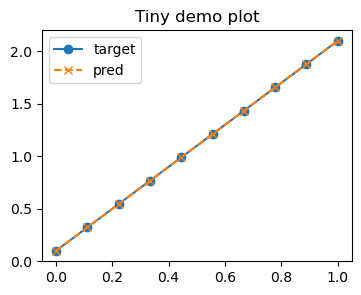

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.plot(X, y, 'o-', label='target')
plt.plot(X, pred, 'x--', label='pred')
plt.legend()
plt.title('Tiny demo plot')
if CONFIG['SHOW_PLOT']:
    plt.show()
else:
    plt.savefig('examples/tiny_demo_plot.png')
    print('saved examples/tiny_demo_plot.png')

In [48]:
# create directory if needed, then save or show depending on CONFIG
out_dir = 'examples'
if CONFIG.get('SHOW_PLOT'):
    plt.show()
else:
    os.makedirs(out_dir, exist_ok=True)
    plt.savefig(os.path.join(out_dir, 'tiny_demo_plot.png'))
    print(f'saved {out_dir}/tiny_demo_plot.png')

saved examples/tiny_demo_plot.png


<Figure size 640x480 with 0 Axes>

## 8) TFLite metadata example (guarded)

In [49]:
# This cell tries to demonstrate how to access metadata from a .tflite file using
# `tensorflow_lite_support`. It is guarded: it will only run if the MODEL_PATH exists.
MODEL_PATH = CONFIG['MODEL_PATH']
if os.path.exists(MODEL_PATH):
    try:
        from tensorflow_lite_support.metadata import metadata as _metadata
        # The metadata API may expose classes to read/display metadata.
        # Example (pseudo):
        # disp = _metadata.MetadataDisplayer.with_model_file(MODEL_PATH)
        # print(disp.get_metadata_json())
        print('Model file found at', MODEL_PATH, '(example code guarded - adapt to your model)')
    except Exception as e:
        print('metadata read failed:', type(e).__name__, e)
else:
    print('No model at', MODEL_PATH, 'To run metadata example, set CONFIG[] to a valid .tflite file path.')

No model at ./model.tflite To run metadata example, set CONFIG[] to a valid .tflite file path.


## 9) Notebook execution cell
Run the notebook cells in order (VS Code Run Cell). The `tinyml-compat` kernel must be selected.